Emilio Taggi 1910388 2023/01/16

In [1]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#with these we can print variables 'inline'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.

In [106]:
# Function to test values provided for initial conditions or integration settings
# The 9 parameters that the user may want to customize are:
# 1) the acceleration of graviti of the planet the simulation is on 
# 2) the time step (dt)
# 3) the angle at which the bullet is shot (theta)
# 4) the height from which the bullet is shot (h)
# 5) the speed at which the bullet is shot (v0)
# 6) the number of pieces in the explosion (N)
# 7) the energy realessed in the explosion
# 8) time of the explosion (Te)
# 9) the mass of the initial projectile
def test_val(var, val):
    test = False
    # Accept ['dt', 'v0','N','E','Te','M'] only if > 0
    if var in ['dt', 'v0','N','E','Te','M']:
        test = val>0
    # Accept initial height >= 0
    elif var=='h':
        test = val>=0
    # allow only 0 < theta < 90 [degrees]
    elif var == 'theta':
        test = (val>0 and val<90)

    return test
        

# Function to handle reading in initial conditions and integration settings
def set_param(var):
    # Dictionary of default values
    defaults = {
        'g' : 9.8, # [m/s^2] default value of the acceleration of gravity
        'dt':     0.01, # [s] Default value of the time step
        'theta': 23.,  # [deg] Default value of the angle at which the bullet is shot
        'h':      5.,  # [m] Default value of the height from which the bullet is shot
        'v0':     10., # [m/s] Default value of the speed at which the bullet is shot
        'N': 3, #number of pieces in the explosion
        'Te': 0.45, #[s] time of the explosion
        'E': 5, #[J] energy of the explosion
        'M' :10 #[kg] mass of mother projectile
    }
    # Dictionary of info messages to the user
    msgs = {
        'g': f"Insert acceleration of gravity g in m/s^2 (press return for {defaults['g']} sec): ",
        'dt': f"Insert dt > 0 in sec (press return for {defaults['dt']} sec): ",
        'theta': f"Insert angle theta in (0,90) degrees (press return for {defaults['theta']} degrees): ",
        'h': f"Insert initial height h in m: (press return for h = {defaults['h']} m): ",
        'v0': f"Insert v_0 > 0 in m/s (press return for {defaults['v0']} m/s): ",
        'N': f"Insert N > 0  (press return for {defaults['N']} ): ",
        'Te': f"Insert Te > 0 in sec (press return for {defaults['Te']} ): ",
        'E': f"Insert E > 0  in Joule (press return for {defaults['E']} ): ",
        'M': f"Insert M > 0  in Kg (press return for {defaults['M']} ): "
    }
    # Start by reading a value and continue until happy with value provided
    while True:
        val_in = input(msgs[var])
        # Allow default value
        if val_in=="":
            val_out = defaults[var]
            break
        # Convert to float...
        try:
            val_out = float(val_in)
        except:
            val_out = -1
        # ...and test value
        if test_val(var, val_out):
            break

    # Convert theta from degrees to radians
    if var=='theta':
        val_out = math.radians(val_out)
    if var=='N':
        val_out = int(val_out)
    
    return val_out

Up to Te time of explosion the plot is the same, then I simulate a parabolic motion for each projectile

In [197]:
# Offer the user the chance to customize values of dt, theta, h, v0
g= set_param('g')
dt = set_param('dt')
theta = set_param('theta')
h = set_param('h')
v0 = set_param('v0')
N = set_param('N')
E = set_param('E')
Te = set_param('Te')
M = set_param('M')

Insert acceleration of gravity g in m/s^2 (press return for 9.8 sec): 
Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 89.999
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 
Insert N > 0  (press return for 3 ): 6
Insert E > 0  in Joule (press return for 5 ): 10
Insert Te > 0 in sec (press return for 0.45 ): 
Insert M > 0  in Kg (press return for 10 ): 


In [9]:
# "Evolution" functions
def x(t,x0,v0x):
    return x0 + v0x*t

def y(t,y0,v0y):
    return y0 + v0y*t - 0.5*g*t*t

In [198]:
#Simulation of the motion of the initial projectile

# Compute initial velocity components
v0x_mother = v0*math.cos(theta)
v0y_mother = v0*math.sin(theta)
# Initial position coordinates
x0_mother = 0
y0_mother = h


# Generate list of times for sampling
times_mother = np.arange(0., Te, dt).tolist() 

# Compute x and y for the initial projectile before explosion
x_y_mother = np.asarray( [ [x(t,x0_mother,v0x_mother),y(t,y0_mother,v0y_mother)] for t in times_mother if y(t,y0_mother,v0y_mother)>=0.] )
x_mother = x_y_mother[:,0]
y_mother = x_y_mother[:,1]

In [217]:
def parabolicMotion_son(theta,x0,y0,v0,v0x_mother,v0y_mother,Te):    
    # Compute initial velocity components (son velocity + mother velocity)
    v0x = v0*math.cos(theta) + v0x_mother
    v0y = v0*math.sin(theta) + v0y_mother - g*Te

    # Generate list of times for sampling
    times = np.arange(0., 1000., dt).tolist() 


    # Compute x and y of the son particle
    x_y_son = np.asarray( [ [x(t,x0,v0x),y(t,y0,v0y)] for t in times if y(t,y0,v0y)>=0.] )
    
    return x_y_son

In [200]:
#Simulation of the pieces produced in the fragment
vson = np.sqrt(2*E/M)  #velocity of each fragement in the rest frame of the proectile
sonList = [parabolicMotion_son(np.random.uniform(0,2*np.pi),x_mother[-1],y_mother[-1],vson,v0x_mother,v0y_mother,Te) for i in range(N-1)]
sonList.append( parabolicMotion_son(np.pi/2,x_mother[-1],y_mother[-1],vson) )

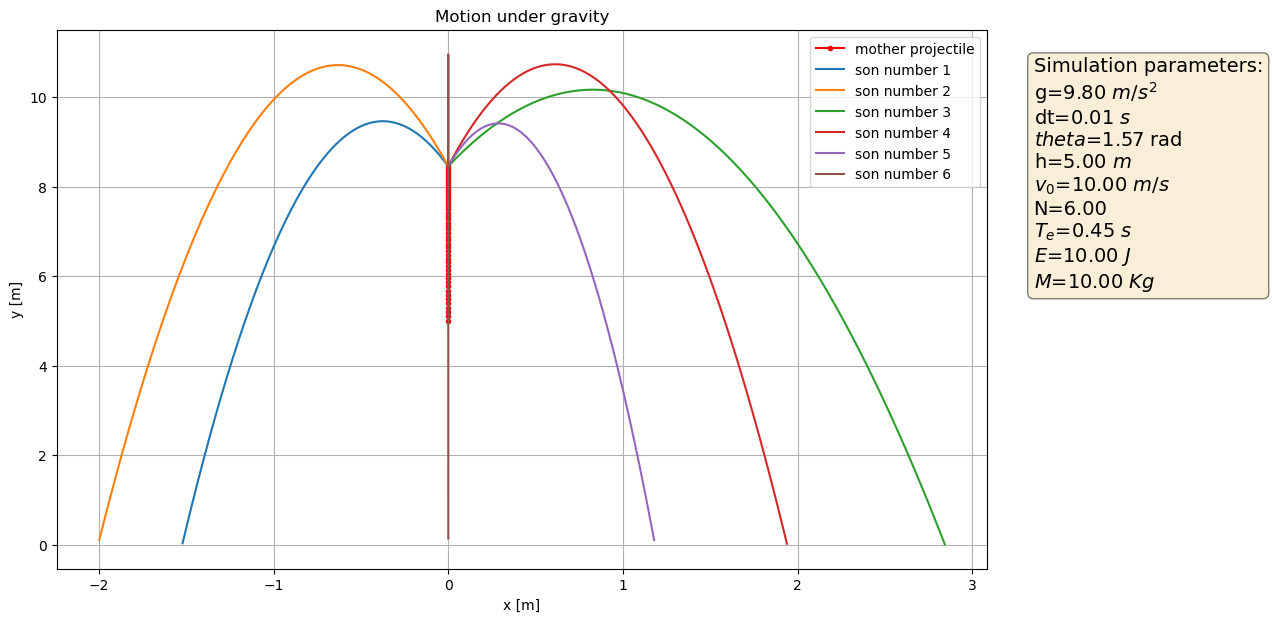

In [201]:
%matplotlib inline
# Plot results...
fig,ax = plt.subplots(1,figsize=(12,7))

#fig.tight_layout()

_ = ax.plot(x_mother, y_mother, label='mother projectile', color='red', marker='.')


# ...and make them look good
_ = ax.set_title('Motion under gravity')
_ = ax.set_xlabel("x [m]")
_ = ax.set_ylabel("y [m]")
_ = ax.grid(True)

for i,son in enumerate(sonList):
    _ = ax.plot(son[:,0],son[:,1],label=f'son number {i+1}')
    
_ = ax.legend()

# plot saving
plt.savefig("./fireworks.png")

#Display text box with frelevant parameters outside the plot
textstr = '\n'.join((
    'Simulation parameters:',
    r'g=%.2f $m/s^2$' % (g ),
    r'dt=%.2f $s$' % (dt ),
    r'$theta$=%.2f rad' % (theta ),
    r'h=%.2f $m$' % (h ),
    r'$v_0$=%.2f $m/s$' % (v0 ),
    r'N=%.2f' % (N ),
    r'$T_e$=%.2f $s$' % (Te ),
    r'$E$=%.2f $J$' % (E ),
    r'$M$=%.2f $Kg$' % (M ), ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place the text box in upper left in axes coords
_ = ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


# plot show
plt.show()

In [228]:
def simulation(askInput = False, plot=True):
    if askInput == True:
        g= set_param('g')
        dt = set_param('dt')
        theta = set_param('theta')
        h = set_param('h')
        v0 = set_param('v0')
        N = set_param('N')
        E = set_param('E')
        Te = set_param('Te')
        M = set_param('M')
    else:
        g = 9.8 # [m/s^2] default value of the acceleration of gravity
        dt =0.01 # [s] Default value of the time step
        theta = 23.  # [deg] Default value of the angle at which the bullet is shot
        h = 5.  # [m] Default value of the height from which the bullet is shot
        v0 = 10. # [m/s] Default value of the speed at which the bullet is shot
        N = 3 #number of pieces in the explosion
        Te = 0.45 #[s] time of the explosion
        E = 5 #[J] energy of the explosion
        M = 10 #[kg] mass of mother projectile
    
    
    #Simulation of the motion of the initial projectile

    # Compute initial velocity components
    v0x_mother = v0*math.cos(theta)
    v0y_mother = v0*math.sin(theta)
    # Initial position coordinates
    x0_mother = 0
    y0_mother = h


    # Generate list of times for sampling
    times_mother = np.arange(0., Te, dt).tolist() 

    # Compute x and y for the initial projectile before explosion
    x_y_mother = np.asarray( [ [x(t,x0_mother,v0x_mother),y(t,y0_mother,v0y_mother)] for t in times_mother if y(t,y0_mother,v0y_mother)>=0.] )
    x_mother = x_y_mother[:,0]
    y_mother = x_y_mother[:,1]
    
    #Simulation of the pieces produced in the fragment
    vson = np.sqrt(2*E/M)  #velocity of each fragement in the rest frame of the proectile
    #sonList = [parabolicMotion_son(np.random.uniform(0,2*np.pi),x_mother[-1],y_mother[-1],vson) for i in range(N-1)]
    sonList = [parabolicMotion_son(np.pi*0.5 + 2*np.pi/N * i,x_mother[-1],y_mother[-1],vson,v0x_mother,v0y_mother,Te) for i in range(N)]
    
    if plot==True:
        %matplotlib inline
        # Plot results...
        fig,ax = plt.subplots(1,figsize=(12,7))

        #fig.tight_layout()

        _ = ax.plot(x_mother, y_mother, label='mother projectile', color='red', marker='.')


        # ...and make them look good
        _ = ax.set_title('Motion under gravity')
        _ = ax.set_xlabel("x [m]")
        _ = ax.set_ylabel("y [m]")
        _ = ax.grid(True)

        for i,son in enumerate(sonList):
            _ = ax.plot(son[:,0],son[:,1],label=f'son number {i+1}')
    
        _ = ax.legend()


        #Display text box with frelevant parameters outside the plot
        textstr = '\n'.join((
            'Simulation parameters:',
            r'g=%.2f $m/s^2$' % (g ),
            r'dt=%.2f $s$' % (dt ),
            r'$\theta$=%.2f rad' % (theta ),
            r'h=%.2f $m$' % (h ),
            r'$v_0$=%.2f $m/s$' % (v0 ),
            r'N=%.2f' % (N ),
            r'$T_e$=%.2f $s$' % (Te ),
            r'$E$=%.2f $J$' % (E ),
            r'$M$=%.2f $Kg$' % (M ), ))

        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        # place the text box in upper left in axes coords
        _ = ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
    return [x_y_mother,sonList]

Insert acceleration of gravity g in m/s^2 (press return for 9.8 sec): 
Insert dt > 0 in sec (press return for 0.01 sec): 
Insert angle theta in (0,90) degrees (press return for 23.0 degrees): 89.999999
Insert initial height h in m: (press return for h = 5.0 m): 
Insert v_0 > 0 in m/s (press return for 10.0 m/s): 100
Insert N > 0  (press return for 3 ): 7
Insert E > 0  in Joule (press return for 5 ): 1
Insert Te > 0 in sec (press return for 0.45 ): 
Insert M > 0  in Kg (press return for 10 ): 


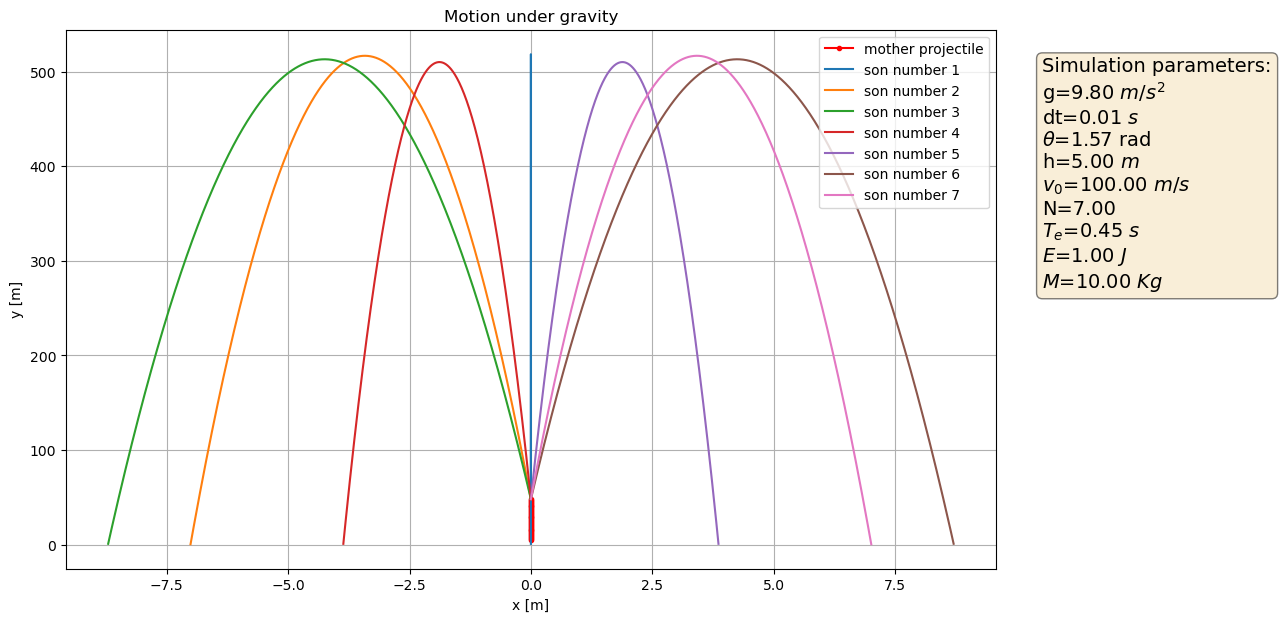

In [237]:
x_y_mother,sonList = simulation(askInput = True)

# 2.

In [230]:
import matplotlib.animation as animation

In [234]:
myMax = np.max([np.max(son) for son in sonList])
lenMax = np.max( [len(son) for son in sonList] )
myMax = np.max(x_y_mother)
x_mother = x_y_mother[:,0]
y_mother = x_y_mother[:,1]

<IPython.core.display.Javascript object>


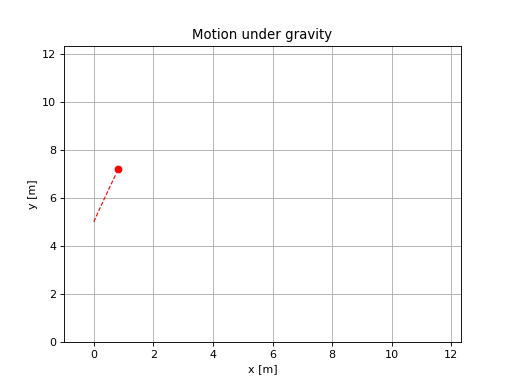

In [238]:
%matplotlib notebook

fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1,myMax), ylim=(0,myMax))

#styling
_ = ax.set_title('Motion under gravity')
_ = ax.set_xlabel("x [m]")
_ = ax.set_ylabel("y [m]")
_ = ax.grid(True)

# 1. Plot the initial state of the plot
line = ax.plot(x_mother[0], y_mother[0], color='red', marker='o')
tail = ax.plot([], [], color='red', lw = 1 ,linestyle ='dashed')
lineList = []
#for j,son in enumerate(sonList):
 #   lineList.append( ax.plot([],[], label='mother projectile', color='red', marker='o') )

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line[0] object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    if i<len(x_mother):
        line[0].set_data(x_mother[i], y_mother[i])
        tail[0].set_data(x_mother[:i], y_mother[:i])
        #for j in range(len(LineList)):
         #   lineList[j][0].set_data([],[])
    #else:
        #for j,son in enumerate(sonList):
            #line[0].set_data([],[])
         #   lineList[j][0].set_data(son[:i,0], son[i,1])
    #lineReturn = line[0]
    
    # Return a tuple
    return line[0],tail[0]

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(x))
anim = animation.FuncAnimation(fig, update_plots, np.arange(1, len(x_mother)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# 3.

In [119]:
#data storing (done right)
import os
dataDir = "simulation_data"
if not os.path.exists(dataDir):
    os.makedirs(dataDir)
np.save(f"{dataDir}/motherProjectile_x_y.npy",x_y_mother)
for i in range(len(sonList)):
    np.save(f"{dataDir}/son{i+1}Projectile_x_y.npy",sonList[i])